In [28]:
import folium
import pandas as pd
# from matplotlib import colormaps, colors

df = pd.read_csv('eda_clean.csv')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

old_poor_condition_houses = df[(df['condition'] < 3) & (df['yr_built'] < 1990)]
other_houses = df[(df['condition'] >= 3) | (df['yr_built'] >= 1990)]
old_poor_median = old_poor_condition_houses['price'].median()
other_median = other_houses['price'].median()

plt.figure(figsize=(10,6))

# Add vertical median lines
plt.axvline(old_poor_median, color='red', linestyle='--', linewidth=2, label=f'Old Poor Median: ${old_poor_median:,.0f}')
plt.axvline(other_median, color='blue', linestyle='--', linewidth=2, label=f'Other Median: ${other_median:,.0f}')

# Format x-axis to show full prices
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Labels and legend
plt.xlim(0, 1_500_000)
plt.xlabel('House Price')
plt.ylabel('Density')
plt.title('Price Distribution: Old Poor Condition Houses vs Other Houses')
plt.legend()
plt.tight_layout()

sns.kdeplot(old_poor_condition_houses['price'], label='Poor Condition & Built < 1990', color='red', fill=True, alpha=0.4)
sns.kdeplot(other_houses['price'], label='Other Houses', color='blue', fill=True, alpha=0.4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import gaussian_kde

old_poor_condition_houses = df[(df['condition'] < 3) & (df['yr_built'] < 1990)]
other_houses = df[(df['condition'] >= 3) | (df['yr_built'] >= 1990)]

old_poor_median = old_poor_condition_houses['price'].median()
other_median = other_houses['price'].median()

# Extract clean arrays
x1 = old_poor_condition_houses['price'].dropna().to_numpy()
x2 = other_houses['price'].dropna().to_numpy()

# Grid and bin width for "counts per $10k"
bin_width = 10_000
x_min, x_max = 0, 3_000_000
grid = np.arange(x_min, x_max + bin_width, bin_width)

# KDEs
kde1 = gaussian_kde(x1)
kde2 = gaussian_kde(x2)

# Convert density -> counts per bin_width
y1 = kde1(grid) * x1.size * bin_width
y2 = kde2(grid) * x2.size * bin_width

# Plot
plt.figure(figsize=(10,6))
plt.plot(grid, y1, label=f'Poor & <1990 (n={x1.size})')
plt.plot(grid, y2, label=f'Other (n={x2.size})')
plt.fill_between(grid, 0, y1, alpha=0.3)
plt.fill_between(grid, 0, y2, alpha=0.3)

# Medians
plt.axvline(old_poor_median, linestyle='--', linewidth=2,
            label=f'Old Poor Median: ${old_poor_median:,.0f}')
plt.axvline(other_median, linestyle='--', linewidth=2,
            label=f'Other Median: ${other_median:,.0f}')

# Format axes
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(round(y)):,}'))
plt.xlim(x_min, x_max)
plt.xlabel('House Price')
plt.ylabel(f'Number of houses per ${bin_width:,.0f}')
plt.title('Price distribution (scaled to counts)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

old_poor_condition_houses = df[(df['condition'] < 3) & (df['yr_built'] < 1990)]
other_houses = df[(df['condition'] >= 3) | (df['yr_built'] >= 1990)]
old_poor_median = old_poor_condition_houses['price'].median()
other_median = other_houses['price'].median()

plt.figure(figsize=(10,6))

# Histogram with counts
sns.histplot(
    old_poor_condition_houses['price'],
    bins=50, color='red', alpha=0.3,
    label='Poor Condition & Built < 1990',
    stat='count',
    log_scale=(False, True)
)

sns.histplot(
    other_houses['price'],
    bins=50, color='blue', alpha=0.3,
    label='Other Houses',
    stat='count',
    log_scale=(False, True)
)

# Add vertical median lines
plt.axvline(old_poor_median, color='red', linestyle='--', linewidth=2)
plt.axvline(other_median, color='blue', linestyle='--', linewidth=2)

# # Annotate median values directly on plot
# ymax = plt.gca().get_ylim()[1]  # top of y-axis
# plt.text(old_poor_median, ymax*0.95, f"${old_poor_median:,.0f}", color='red', ha='center', va='top', rotation=90, fontsize=10, fontweight='bold')
# plt.text(other_median, ymax*0.95, f"${other_median:,.0f}", color='blue', ha='center', va='top', rotation=90, fontsize=10, fontweight='bold')

# Format x-axis to show dollars
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Limit x-axis to 0–3 million
# plt.xlim(0, 3_000_000)

# Labels and legend
plt.xlabel('House Price')
plt.ylabel('Number of Houses')
plt.title('Price Distribution: Old Poor Condition Houses vs Other Houses')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

old_poor_condition_houses = df[(df['condition'] < 3) & (df['yr_built'] < 1990)]
other_houses = df[(df['condition'] >= 3) | (df['yr_built'] >= 1990)]
old_poor_median = old_poor_condition_houses['price'].median()
other_median = other_houses['price'].median()

plt.figure(figsize=(10,6))

# Histogram with counts + log scale
sns.histplot(
    old_poor_condition_houses['price'],
    bins=50, color='red', alpha=0.3,
    label='Poor Condition & Built < 1990',
    stat='count',
    log_scale=(False, True)   # 👈 log scale on y-axis
)

sns.histplot(
    other_houses['price'],
    bins=50, color='blue', alpha=0.3,
    label='Other Houses',
    stat='count',
    log_scale=(False, True)
)

# Smooth density curves
# sns.kdeplot(old_poor_condition_houses['price'], color='red', linewidth=2)
# sns.kdeplot(other_houses['price'], color='blue', linewidth=2)

# Median lines
plt.axvline(old_poor_median, color='red', linestyle='--', linewidth=2)
plt.axvline(other_median, color='blue', linestyle='--', linewidth=2)

# # Annotate medians
# ymax = plt.gca().get_ylim()[1]
# plt.text(old_poor_median, ymax*0.8, f"${old_poor_median:,.0f}", color='red', ha='center', va='top', rotation=90, fontsize=10, fontweight='bold')
# plt.text(other_median, ymax*0.8, f"${other_median:,.0f}", color='blue', ha='center', va='top', rotation=90, fontsize=10, fontweight='bold')

# Format x-axis as dollars
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Limit x-axis
plt.xlim(0, 3_000_000)

plt.xlabel('House Price')
plt.ylabel('Number of Houses (log scale)')
plt.title('Price Distribution: Old Poor Condition Houses vs Other Houses')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

old_poor_condition_houses = df[(df['condition'] < 3) & (df['yr_built'] < 1990)]
other_houses = df[(df['condition'] >= 3) | (df['yr_built'] >= 1990)]
old_poor_median = old_poor_condition_houses['price'].median()
other_median = other_houses['price'].median()
percentage = round((1 - (old_poor_median / other_median)) * 100, 2)

# Create a combined dataframe for plotting
df_plot = pd.concat([
    old_poor_condition_houses.assign(group='poor condition & built pre-1990'),
    other_houses.assign(group='other properties')
])

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df_plot, x="price", y="season", hue="month")
ax.set(ylabel="")

KeyboardInterrupt: 

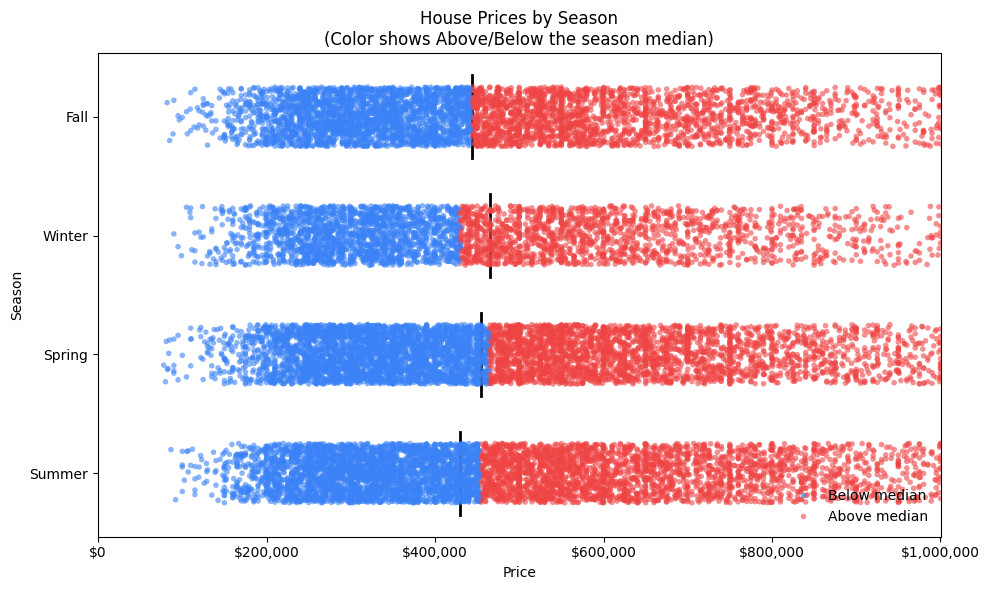

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1) Add season median + Above/Below flag
df_plot = df.copy()
df_plot['season_median'] = df_plot.groupby('season')['price'].transform('median')
df_plot['position_vs_median'] = np.where(df_plot['price'] >= df_plot['season_median'],
                                         'Above median', 'Below median')

# 2) Plot: categorical scatter with price on x-axis
plt.figure(figsize=(10, 6))
ax = sns.stripplot(
    data=df_plot,
    x='price', y='season',
    hue='position_vs_median',
    jitter=0.25, dodge=False, alpha=0.6, size=4,
    palette={'Below median': '#3B82F6', 'Above median': '#EF4444'}  # blue / red
)

# 3) Optional: add a short median tick for each season
y_positions = {cat: i for i, cat in enumerate(sorted(df_plot['season'].unique()))}
for season, g in df_plot.groupby('season'):
    med = g['season_median'].iloc[0]
    y = y_positions[season]
    # draw a short horizontal marker at the median (so it looks like a vertical tick through the strip)
    ax.plot([med, med], [y - 0.35, y + 0.35], color='black', linewidth=2)

# 4) Format axes
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlim(0, 1_000_000)  # cap at $3M if desired
plt.xlabel('Price')
plt.ylabel('Season')
plt.title('House Prices by Season\n(Color shows Above/Below the season median)')
plt.legend(title='', loc='lower right', frameon=False)  # tidy legend
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create grouping: Winter vs Other
df_plot = df.copy()
df_plot['season_group'] = np.where(df_plot['season'] == 'Winter', 'Winter', 'Other Seasons')

# Add group median and Above/Below flag
df_plot['group_median'] = df_plot.groupby('season_group')['price'].transform('median')
df_plot['position_vs_median'] = np.where(df_plot['price'] >= df_plot['group_median'],
                                         'Above median', 'Below median')

# Plot swarmplot
plt.figure(figsize=(10,6))
ax = sns.swarmplot(
    data=df_plot,
    x='price', y='season_group',
    hue='position_vs_median',
    dodge=False, alpha=0.7, size=4,
    palette={'Below median': '#3B82F6', 'Above median': '#EF4444'}
)

# Format x-axis as dollars
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.xlim(100_000, 1_000_000)

plt.xlabel('Price')
plt.ylabel('')
plt.title('House Prices: Winter vs Other Seasons\n(Color shows Above/Below median)')
plt.legend(title='', loc='lower right', frameon=False)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

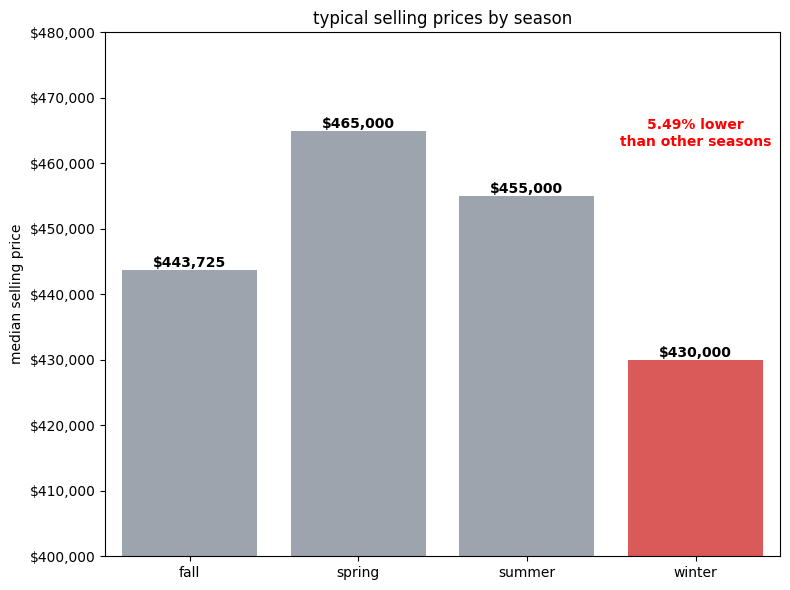

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Calculate median price per season
season_medians = df.groupby('season')['price'].median().reset_index()

# Compute percentage difference: Winter vs Other seasons
winter_median = season_medians.loc[season_medians['season'] == 'winter', 'price'].values[0]
other_median = season_medians.loc[season_medians['season'] != 'winter', 'price'].median()
percent_lower = (other_median - winter_median) / other_median * 100

# Define custom colors: highlight Winter in red, others in gray
colors = ['#EF4444' if season == 'winter' else '#9CA3AF'  # red vs gray
          for season in season_medians['season']]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=season_medians,
    x='season', y='price',
    palette=colors,
    hue='season',
    legend=False
)

# Add value labels on top of each bar
for i, row in season_medians.iterrows():
    ax.text(
        i, row['price'], f"${row['price']:,.0f}",
        ha='center', va='bottom', fontweight='bold', color='black'
    )

# Add percentage difference annotation above Winter bar
winter_index = season_medians.index[season_medians['season'] == 'winter'][0]
ax.text(
    winter_index, winter_median * 1.075,  # a bit above Winter bar
    f"{percent_lower:.2f}% lower\nthan other seasons",
    ha='center', va='bottom', fontsize=10, fontweight='bold', color='red'
)

# Format y-axis as dollars
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

plt.ylim(400_000, 480_000) 
plt.xlabel('')
plt.ylabel('median selling price')
plt.title('typical selling prices by season')
plt.tight_layout()
plt.show()